In [14]:
# Let's have a look at a simulation of both Alpha cen A and B:
import dLux as dl
import pandas as pd
from scipy.stats import binned_statistic
import dLux.utils as dlu
import jax.numpy as np
import dLuxToliman as dlT
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load from CSV
df_A = pd.read_csv("alpha_cen_A_spectrum.csv")  # replace with correct path if needed

# Step 2: Apply mask (wavelengths in Ångstroms, like original)
mask_A = (df_A["wavelength"] >= 5200) & (df_A["wavelength"] <= 6500)

# Step 3: Extract and convert to meters
wavelengths_A = df_A["wavelength"][mask_A].to_numpy() * 1e-10  # meters
weights_A = df_A["flux"][mask_A].to_numpy()

# Step 4: Downsample using binning
n_bins = 500
bin_means_A, bin_edges_A, _ = binned_statistic(
    wavelengths_A, weights_A, statistic='mean', bins=n_bins
)
bin_centers_A = 0.5 * (bin_edges_A[:-1] + bin_edges_A[1:])

# Step 5: Create the point source
alpha_cen_a_source = dl.PointSource(
    wavelengths=bin_centers_A,
    weights=bin_means_A,
    flux=1e6
)



In [20]:
# Step 1: Load from CSV
df_B = pd.read_csv("alpha_cen_B_spectrum.csv")  # replace with correct path if needed

# Step 2: Apply mask (wavelengths in Ångstroms, like original)
mask_B = (df_B["wavelength"] >= 5200) & (df_B["wavelength"] <= 6500)

# Step 3: Extract and convert to meters
wavelengths_B = df_B["wavelength"][mask_B].to_numpy() * 1e-10  # meters
weights_B = df_B["flux"][mask_B].to_numpy()

# Step 4: Downsample using binning
n_bins = 500
bin_means_B, bin_edges_B, _ = binned_statistic(
    wavelengths_B, weights_B, statistic='mean', bins=n_bins
)
bin_centers_B = 0.5 * (bin_edges_B[:-1] + bin_edges_B[1:])

# Step 5: Create the point source
alpha_cen_b_source = dl.PointSource(
    wavelengths=bin_centers_B,
    weights=bin_means_B,
    flux=0.2*1e6,
    position = dlu.arcsec2rad(np.array([0,10]))
)


In [21]:
sources = [alpha_cen_a_source, alpha_cen_b_source]

In [22]:
print(sources)

[PointSource(
  spectrum=Spectrum(wavelengths=f32[500], weights=f32[500]),
  position=f32[2],
  flux=1000000.0
), PointSource(
  spectrum=Spectrum(wavelengths=f32[500], weights=f32[500]),
  position=f32[2],
  flux=200000.0
)]


In [23]:
# constructing the telescope:
wf_npixels = 256 # nice and low res
diameter = 0.125
period = 304e-6
difference = np.pi * 0.348

apertureLayer = dlT.TolimanApertureLayer(wf_npixels)

layers = [
    (
        'aperture',
        apertureLayer
    )
]

psf_npixels = 300
true_pixel_scale = 0.375
oversample = 4 # high level oversample

optics = dl.AngularOpticalSystem(wf_npixels,diameter,layers,psf_npixels,true_pixel_scale,oversample)

In [24]:
alpha_cen_scope = dl.Telescope(optics,sources)

sidelobescope = dlT.SideLobeTelescope(alpha_cen_scope, period, difference)

In [25]:
center_wl = 585e-9
pixel_scale = 0.375

sidelobes = dlu.downsample(sidelobescope.model_sidelobes(center_wavelength = center_wl, assumed_pixel_scale = pixel_scale),4,False)

Model time: 81.9536 seconds.


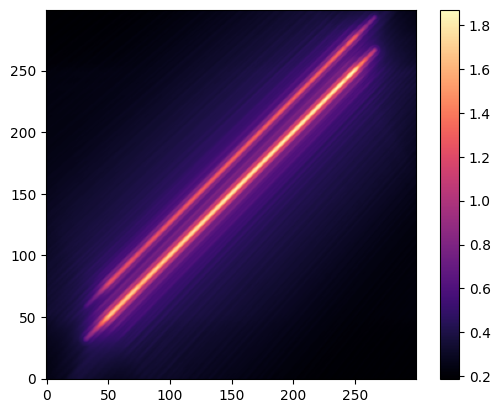

In [31]:
plt.imshow(sidelobes**0.2,origin='lower',cmap='magma')
plt.colorbar()
plt.show()

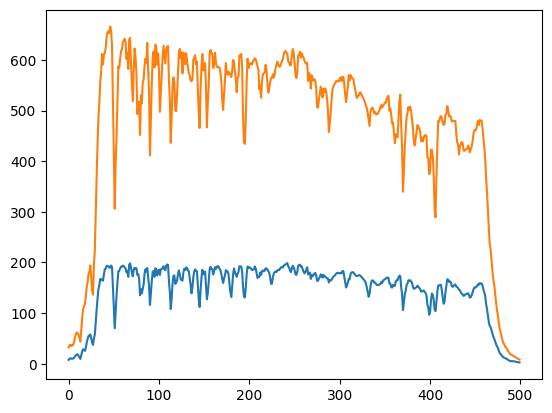

In [29]:
plt.plot(bin_means_B)
plt.plot(bin_means_A)
plt.show()

In [ ]:
dlT.AlphaCen()